In [ ]:

import sys
sys.path.append('/home/scuk/RS/mujoco-py')
import mujoco_py
import safety_gym
import gym
from thinker import wrapper
import cv2
import numpy as np

env = gym.make('Safexp-PointGoal1-v0')
env = wrapper.DiscretizeActionWrapper(env)
env = wrapper.RepeatActionWrapper(env, frame_stack_n=4)
env.reset()
for _ in range(100):
    state, reward, done, info = env.step([5])
    if done: 
        env.reset()
        print("Done!")

In [1]:
from thinker.main import Env
from thinker.self_play import init_env_out, create_env_out
from thinker.actor_net import ActorNet
import thinker.util as util
import os
import torch

seed = 1
xpid = "v14_se"
savedir = "/home/scuk/RS/thinker/logs/detect/"

ckpdir = os.path.join(savedir, xpid) 

config_path = os.path.join(ckpdir, 'config_c.yaml')
flags = util.create_flags(config_path, save_flags=False)

env = Env(
    name=flags.name,
    env_n=1,
    base_seed=seed,        
    gpu=False,
    train_model=False,
    parallel=False,
    savedir=savedir,        
    xpid=xpid,
    ckp=True,
    return_x=True)
state = env.reset()


Initializing env 0 with device cpu
Model network size: 6637133


Loaded config from /home/scuk/RS/thinker/logs/detect/v14_se/config_c.yaml


Loaded model net from /home/scuk/RS/thinker/logs/detect/v14_se/ckp_model.tar


Tree rep shape:  95
Tree rep meaning:  {'root_td': slice(0, 1, None), 'root_action': slice(1, 6, None), 'root_r': slice(6, 7, None), 'root_v': slice(7, 8, None), 'root_logits': slice(8, 13, None), 'cur_td': slice(13, 14, None), 'cur_action': slice(14, 19, None), 'cur_r': slice(19, 20, None), 'cur_v': slice(20, 21, None), 'cur_logits': slice(21, 26, None), 'cur_reset': slice(26, 27, None), 'one_hot_k': slice(27, 37, None), 'rollout_return': slice(37, 38, None), 'max_rollout_return': slice(38, 39, None), 'rollout_done': slice(39, 40, None), 'root_action_table': slice(40, 65, None), 'root_td_table': slice(65, 70, None), 'action_seq': slice(70, 95, None)}


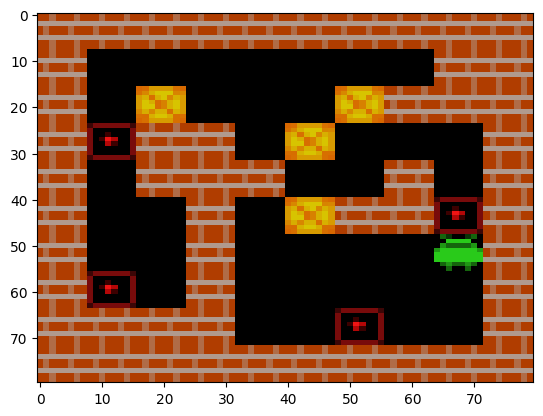

In [2]:
util.plot_raw_state(state['xs'][0])

root_td tensor([[0.0033]])
root_action tensor([[0., 0., 0., 1., 0.]])
root_r tensor([[-0.0100]])
root_v tensor([[-0.1920]])
root_logits tensor([[-2.4175, -0.0629,  1.2384, -0.2819,  0.9230]])
cur_td tensor([[0.0033]])
cur_action tensor([[0., 0., 0., 1., 0.]])
cur_r tensor([[-0.0100]])
cur_v tensor([[-0.1920]])
cur_logits tensor([[-2.4175, -0.0629,  1.2384, -0.2819,  0.9230]])
cur_reset tensor([[0.]])
one_hot_k tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])
rollout_return tensor([[-0.1920]])
max_rollout_return tensor([[-0.1920]])
rollout_done tensor([[0.]])
root_action_table tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0.]])
root_td_table tensor([[0., 0., 0., 0., 0.]])
action_seq tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0.]])


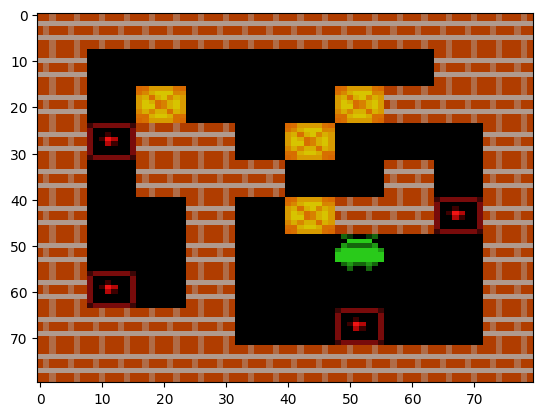

In [23]:
pri = [3]
res = [0]

for a, r in zip(pri, res):
    state, reward, done, info = env.step(torch.tensor([a]), torch.tensor([r]))
tr = env.decode_tree_reps(state['tree_reps'])

util.plot_raw_state(state['xs'][0])
for k, v in tr.items():
    print(k, v)

In [3]:
tr["cur_r"] + env.discounting * tr["cur_v"] - tr["root_v"]

tensor([[0.0130]])

In [15]:
-0.0086 + 0.97 * -0.0035 + 0.97 ** 2 * -0.1486

-0.15181274

In [10]:
tr["cur_r"]

IndexError: too many indices for tensor of dimension 2

3


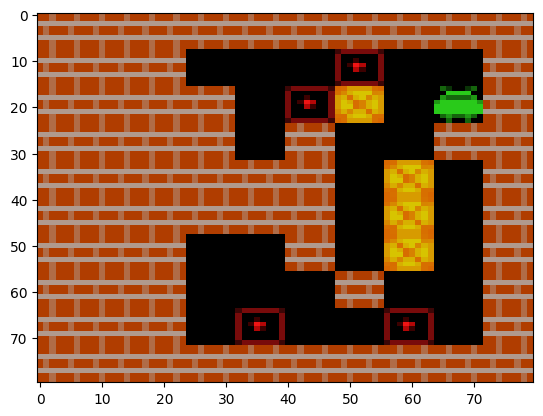

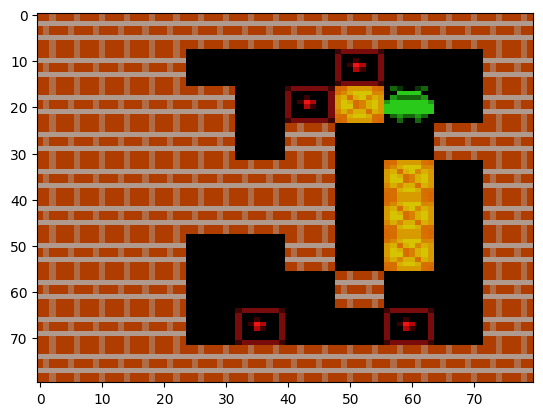

In [37]:
b = 3
t = -2

s_t = d['real_state'][t, b]
a_t = d['action'][t + 1, b]
s_t1 = d['real_state'][t + 1, b]

util.plot_raw_state(torch.tensor(s_t))
util.plot_raw_state(torch.tensor(s_t1))
print(a_t)